## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
import seaborn as sns
import urllib.request
import os
from pathlib import Path
def getting_the_data(current_script_dir:str, url_csv) -> str:
    """Downloading the required data CSV file if not already downloaded.
    Returns:
        str: The local file path
    """
    output_path = os.path.join(current_script_dir, Path(url_csv).name)
    # only download if neccessary
    if not os.path.exists(output_path):
        urllib.request.urlretrieve(
            url_csv,
            output_path
        )
    return output_path

notebook_dir = globals()['_dh'][0]

In [2]:
df_file_path = getting_the_data(
    notebook_dir, 
    "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
    )

In [3]:
use_columns = [
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP',
]
df = pd.read_csv(df_file_path, usecols=use_columns)
df.rename(columns={'MSRP': 'price'}, inplace=True)
df.columns = df.columns.str.replace(' ', '_').str.lower()
display(df.info())
df.fillna(0, inplace=True)
display(
    df.head(),
    df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


None

---

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- **`AUTOMATIC`**
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

<Axes: >

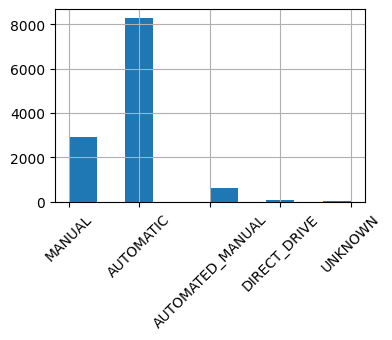

In [4]:
display(df.transmission_type.value_counts(ascending=False), df.transmission_type.hist(figsize=(4,2.5), xrot=45))

### Answer Q2

In [5]:
df.transmission_type.value_counts(ascending=False).index[0]

'AUTOMATIC'

In [6]:
df.transmission_type.mode().values[0]

'AUTOMATIC'

---

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- **`highway_mpg` and `city_mpg`**

In [7]:
corr_mat = df.drop(columns='price').select_dtypes(include=['int64', 'float64']).corr()
corr_mat.style.background_gradient(cmap='viridis')

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


In [8]:
n, m = corr_mat.shape
indices = np.triu_indices(n,k=0, m=m)
corr_mat.values[indices] = np.nan
corr_mat

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,NaN,NaN,NaN,NaN,NaN
engine_hp,0.338714,NaN,NaN,NaN,NaN
engine_cylinders,-0.040708,0.774851,NaN,NaN,NaN
highway_mpg,0.258240,-0.415707,-0.614541,NaN,NaN
city_mpg,0.198171,-0.424918,-0.587306,0.886829,NaN


In [9]:
max_value_index = np.nanargmax(corr_mat.values, axis=None)
row_index, col_index = np.unravel_index(max_value_index, corr_mat.shape)
row_label = corr_mat.index.values[row_index]
col_label = corr_mat.columns[col_index]

### Answer Q2

In [10]:
row_label, col_label

('city_mpg', 'highway_mpg')

---

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [11]:
df['above_average'] = (df.price > df.price.mean()).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [12]:

seed = 42
frac_train = 0.6
frac_val = 0.2
frac_test = 0.2
df_train_full, df_test = train_test_split(
    df, test_size=frac_test, shuffle=True, random_state=seed)
df_train, df_val = train_test_split(
    df_train_full, test_size=frac_val/(frac_train+frac_val), shuffle=True, random_state=seed)
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475,0


In [13]:
# seed = 42
# frac_train = 0.6
# frac_val = 0.2
# frac_test = 0.2
# X_train, X_test = train_test_split(
#     df, test_size=frac_val+frac_test, shuffle=True, random_state=seed)
# X_val, X_test = train_test_split(
#     X_test, test_size=frac_test/(frac_val+frac_test), shuffle=False)

In [14]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475,0


### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- **`transmission_type`**
- `vehicle_style`

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_hp          7148 non-null   float64
 4   engine_cylinders   7148 non-null   float64
 5   transmission_type  7148 non-null   object 
 6   vehicle_style      7148 non-null   object 
 7   highway_mpg        7148 non-null   int64  
 8   city_mpg           7148 non-null   int64  
 9   price              7148 non-null   int64  
 10  above_average      7148 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 614.4+ KB


In [16]:
mu_scores = df_train.select_dtypes(include=['object']).apply(lambda x:  mutual_info_score(x, df_train.above_average))
mu_scores_sorted = mu_scores.sort_values(ascending=True).round(decimals=2)
mu_scores_sorted

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Answer Q3

In [17]:
mu_scores_sorted.index[0]

'transmission_type'

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- **0.95**

In [18]:
def dataframe_ohe(df_train, df_test):
    vectorizer = DictVectorizer(sparse=False)

    ohe_data_train = vectorizer.fit_transform(df_train.to_dict(orient='records'))
    df_encoded_train = pd.DataFrame(ohe_data_train, columns=vectorizer.get_feature_names_out())
    #print(vectorizer.get_feature_names_out().shape)

    ohe_data_test = vectorizer.transform(df_test.to_dict(orient='records'))
    df_encoded_test = pd.DataFrame(ohe_data_test, columns=vectorizer.get_feature_names_out())

    # retrieving missing columns
    missing_columns = set(df_encoded_train) ^ set(df_encoded_test)
    if len(missing_columns) > 0: 
        print(f"missing_columns: {missing_columns}")

        all_columns = set(df_encoded_train) | set(df_encoded_test)
        all_columns = sorted(all_columns, reverse=False)
        df_encoded_train = df_encoded_train.reindex(columns=all_columns, fill_value=0)
        df_encoded_test = df_encoded_test.reindex(columns=all_columns, fill_value=0)

    return df_encoded_train, df_encoded_test

def split_X_y(df, drop_cols=['price', 'above_average'], y_col='above_average'):
    X = df.drop(columns=drop_cols)
    y = df[y_col]
    for col in drop_cols:
        assert(col not in X)
    return X, y

In [19]:
X_train, y_train = split_X_y(df_train)
X_val, y_val = split_X_y(df_val)
df_ohe_train, df_ohe_val = dataframe_ohe(X_train, X_val)

In [20]:

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(df_ohe_train, y_train)
y_pred_val = model.predict(df_ohe_val)

accuracy = accuracy_score(y_val, y_pred_val)

### Answer Q4

In [21]:
print(f"{accuracy:.2f}")

0.95


---

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- **`year`**
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [22]:
X_train, y_train = split_X_y(df_train)
X_val, y_val = split_X_y(df_val)
accuracy_orig = accuracy
accuracy_without_feature = {}
for feature in X_train.columns:
    df_ohe_train, df_ohe_val = dataframe_ohe(X_train.drop(columns=feature), X_val.drop(columns=feature))
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(df_ohe_train, y_train)
    y_pred_val = model.predict(df_ohe_val)
    accuracy_without_feature[feature] = accuracy_score(y_val, y_pred_val)

In [23]:
sorted(accuracy_without_feature.items(), key=lambda kv: kv[1], reverse=False)

[('model', 0.9164918170373478),
 ('engine_hp', 0.9206882081409987),
 ('vehicle_style', 0.9362148552245069),
 ('engine_cylinders', 0.9374737725556022),
 ('make', 0.9387326898866974),
 ('highway_mpg', 0.9399916072177927),
 ('transmission_type', 0.9412505245488879),
 ('year', 0.9467058329836341),
 ('city_mpg', 0.9467058329836341)]

In [24]:
diff = {k: np.abs(v-accuracy_orig) for k,v in accuracy_without_feature.items()}
sorted(diff.items(), key=lambda kv: kv[1], reverse=False)

[('year', 0.0008392782207301552),
 ('city_mpg', 0.0008392782207301552),
 ('transmission_type', 0.00461603021401602),
 ('highway_mpg', 0.005874947545111198),
 ('make', 0.007133864876206486),
 ('engine_cylinders', 0.008392782207301774),
 ('vehicle_style', 0.009651699538397063),
 ('engine_hp', 0.025178346621905212),
 ('model', 0.0293747377255561)]

### Answer Q5

In [25]:
sorted(diff.items(), key=lambda kv: kv[1], reverse=False)[0]

('year', 0.0008392782207301552)

---

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- **0**
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [26]:
X_train, y_train = split_X_y(df_train, y_col='price')
X_val, y_val = split_X_y(df_val)
df_ohe_train, df_ohe_val = dataframe_ohe(X_train, X_val)

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

rmse_values = {}
for alpha in [0, 0.01, 0.1, 1, 10]: 
    print(alpha)
    model = Ridge(solver="sag", alpha=alpha,  random_state=42)
    model.fit(df_ohe_train, y_train)
    y_pred_val = model.predict(df_ohe_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_values[alpha] = accuracy


0


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


10


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
rounded_rmse_values = {k: np.round(v, decimals=3) for k,v in rmse_values.items()}
sorted(rounded_rmse_values.items(), key=lambda kv: kv[1], reverse=True)

[(0, 0.946), (0.01, 0.946), (0.1, 0.946), (1, 0.946), (10, 0.946)]

## Submit the results

* Submit your results here: TBD
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.